In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("1_train.csv")
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08
5,2010-07-07,8.92,9.36,8.99,9.21,7.87,6.545560e+08
6,2010-07-08,9.57,9.38,9.09,9.26,7.70,7.381444e+08
7,2010-07-09,9.21,9.18,8.95,9.23,8.06,4.333224e+08
8,2010-07-12,9.16,9.20,9.01,9.20,7.70,5.628784e+08
9,2010-07-13,9.27,9.27,8.98,8.94,7.56,1.190924e+09


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head(10)

,Date,Open,High,Low,Adj Close,Volume,Company,ID
0,17-07-2020,101.04,102.52,99.28,99.93,139950000.0,4.0,0
1,20-07-2020,101.28,110.03,99.24,109.62,256821000.0,4.0,1
2,21-07-2020,109.12,111.60,103.88,104.46,241608000.0,4.0,2
3,22-07-2020,106.65,108.45,104.05,105.86,212416500.0,4.0,3
4,23-07-2020,112.07,112.49,98.92,101.04,364927500.0,4.0,4
5,24-07-2020,94.49,97.76,91.17,94.47,290949000.0,4.0,5
6,27-07-2020,95.72,103.17,94.28,102.77,240730500.0,4.0,6
7,28-07-2020,100.21,104.41,98.31,98.26,237130500.0,4.0,7
8,29-07-2020,100.14,102.33,99.09,99.91,141403500.0,4.0,8
9,30-07-2020,99.44,100.85,97.92,99.26,114315000.0,4.0,9


In [ ]:
train_files = ['1_train.csv', '2_train.csv', '3_train.csv', '4_train.csv']
for y in range(0,4):
    if y==0 : 
        print("Data for ",y+1,"st company :- ")
    elif y ==1 :
        print("Data for ",y+1,"nd company :- ")
    elif y ==2 :
        print("Data for ",y+1,"rd company :- ")
    else:
        print("Data for ",y+1,"th company :- ")
        
    cols = ["Open","High","Low","Close","Adj Close","Volume"]
    training_data1 = pd.read_csv(train_files[y])
    date_time = pd.to_datetime(training_data1["Date"],infer_datetime_format=True)


    data_df=training_data1.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"})
    data_df['date'] = pd.to_datetime(data_df.date)
    data_df.sort_values(by='date', inplace=True)


    # data_df = data_df[(data_df['date'] > '2020-1-1') & (data_df['date'] <= '2020-6-20')]
    
    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price', 'Stock  Adjusted Close'])

    fig = px.line(data_df, x=data_df.date, y=[data_df['open'], data_df['close'], 
                                              data_df['high'], data_df['low'], data_df['Adj Close']],
                 labels={'date': 'Date','value':'Stock value'})
#     fig = px.line(data_df, x=data_df.date, y=[data_df['close']-data_df['Adj Close']],
#                  labels={'date': 'Date','value':'Stock value'})
   
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    fig.show()

In [4]:
train_files = ['1_train.csv', '2_train.csv', '3_train.csv', '4_train.csv']
for y in range(0,4):
    if y==0 : 
        print("Data for ",y+1,"st company :- ")
    elif y ==1 :
        print("Data for ",y+1,"nd company :- ")
    elif y ==2 :
        print("Data for ",y+1,"rd company :- ")
    else:
        print("Data for ",y+1,"th company :- ")
        
    cols = ["Open","High","Low","Close","Adj Close","Volume"]
    training_data1 = pd.read_csv(train_files[y])
    date_time = pd.to_datetime(training_data1["Date"],infer_datetime_format=True)


    data_df=training_data1.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"})
    data_df['date'] = pd.to_datetime(data_df.date)
    data_df.sort_values(by='date', inplace=True)


    data_df = data_df[(data_df['date'] > '2020-1-1') & (data_df['date'] <= '2020-6-20')]
    
    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price', 'Stock  Adjusted Close'])

    fig = px.line(data_df, x=data_df.date, y=[data_df['open'], data_df['close'], 
                                              data_df['high'], data_df['low'], data_df['Adj Close']],
                 labels={'date': 'Date','value':'Stock value'})
#     fig = px.line(data_df, x=data_df.date, y=[data_df['close']-data_df['Adj Close']],
#                  labels={'date': 'Date','value':'Stock value'})
   
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    fig.show()

Data for  1 st company :- 


Data for  2 nd company :- 


Data for  3 rd company :- 


Data for  4 th company :- 


Data for  1 st company :- 


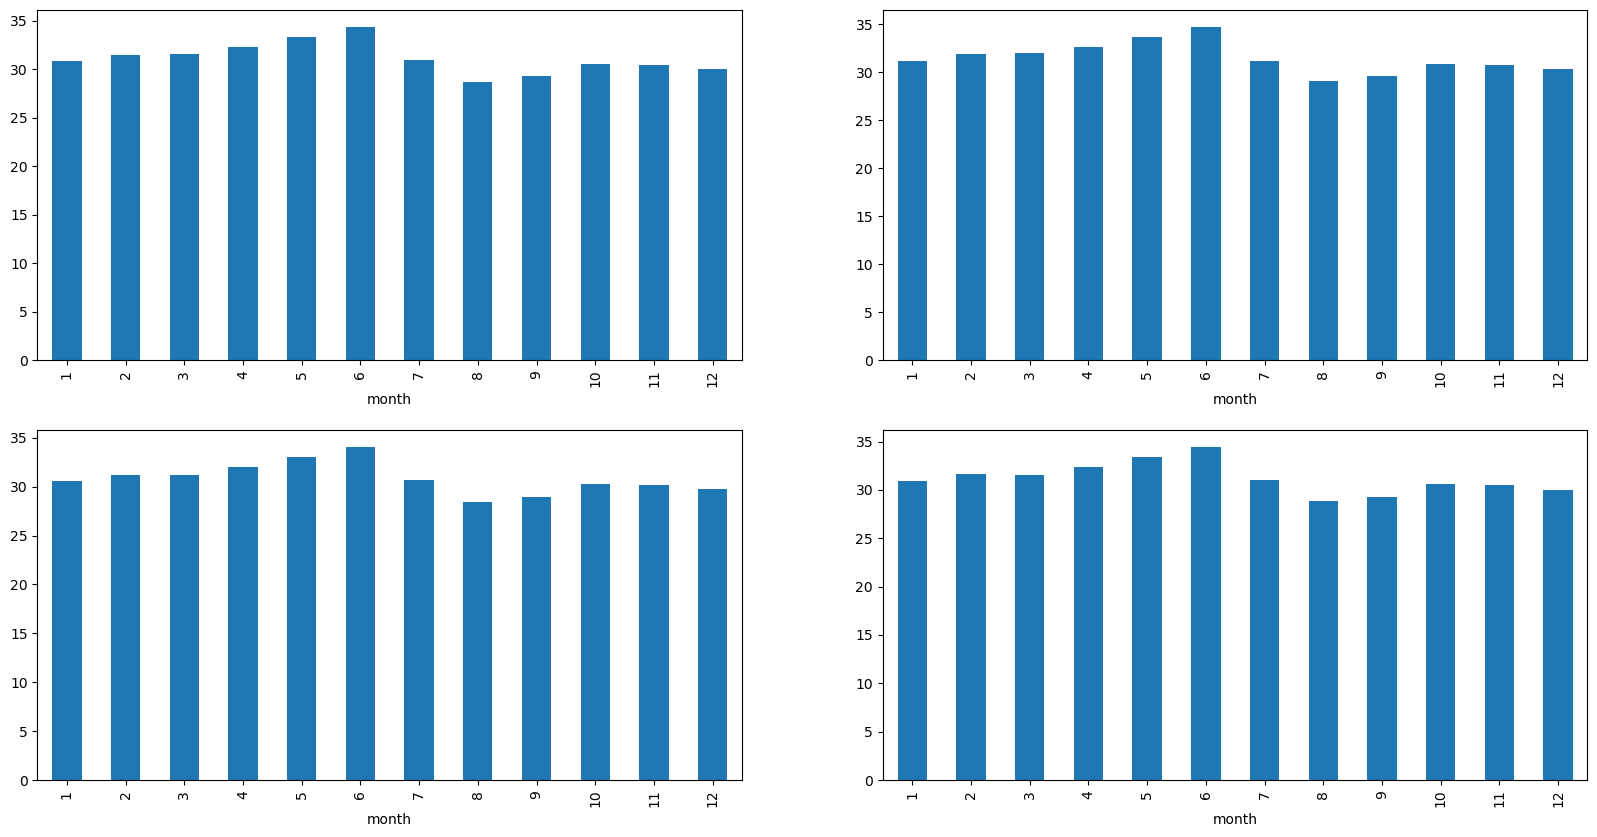

Data for  2 nd company :- 


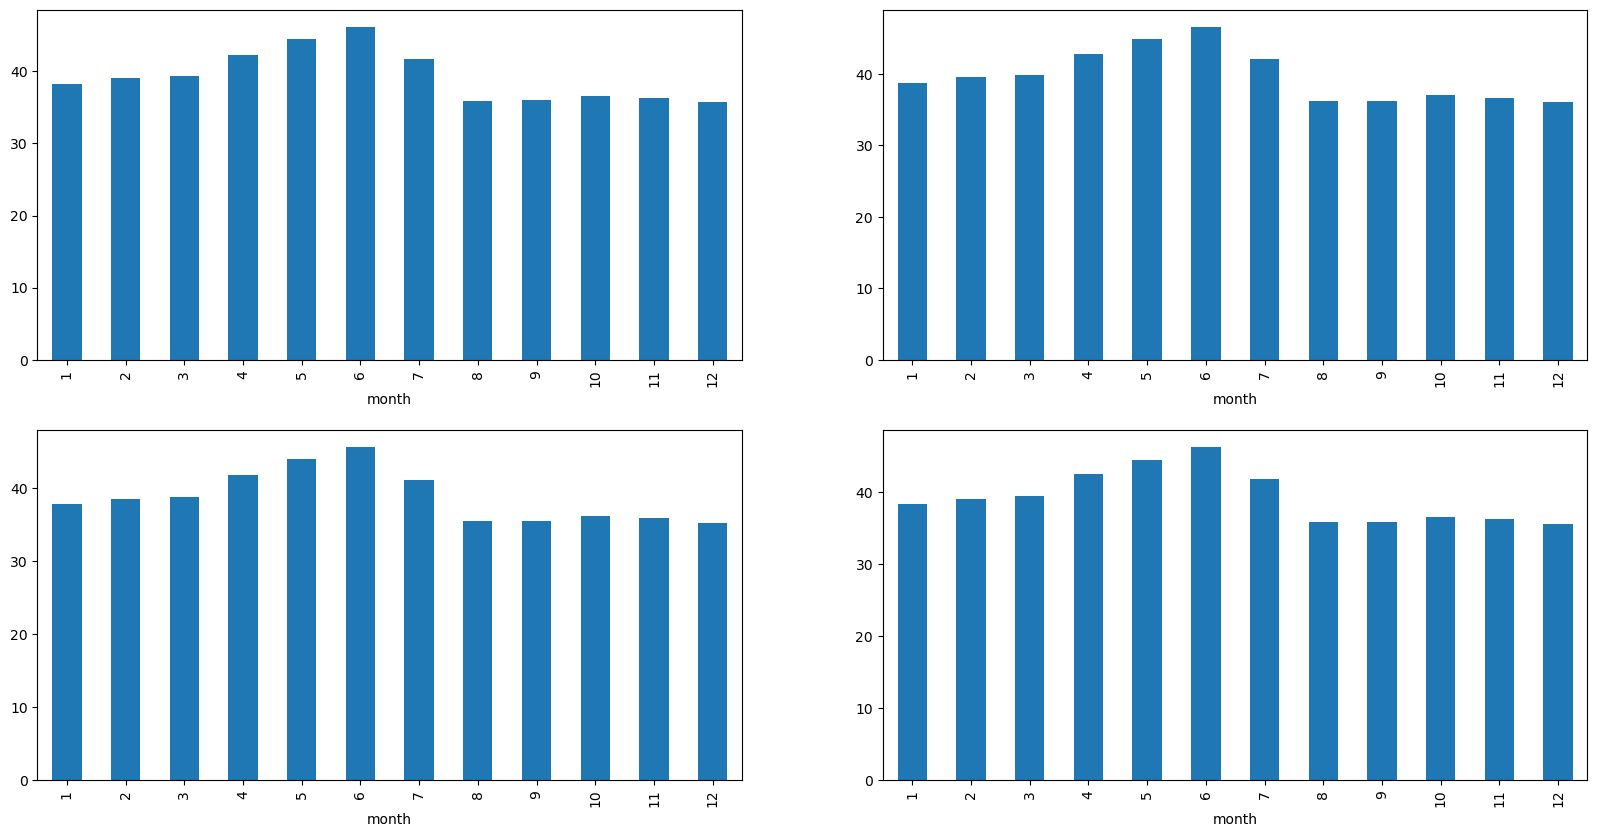

Data for  3 th company :- 


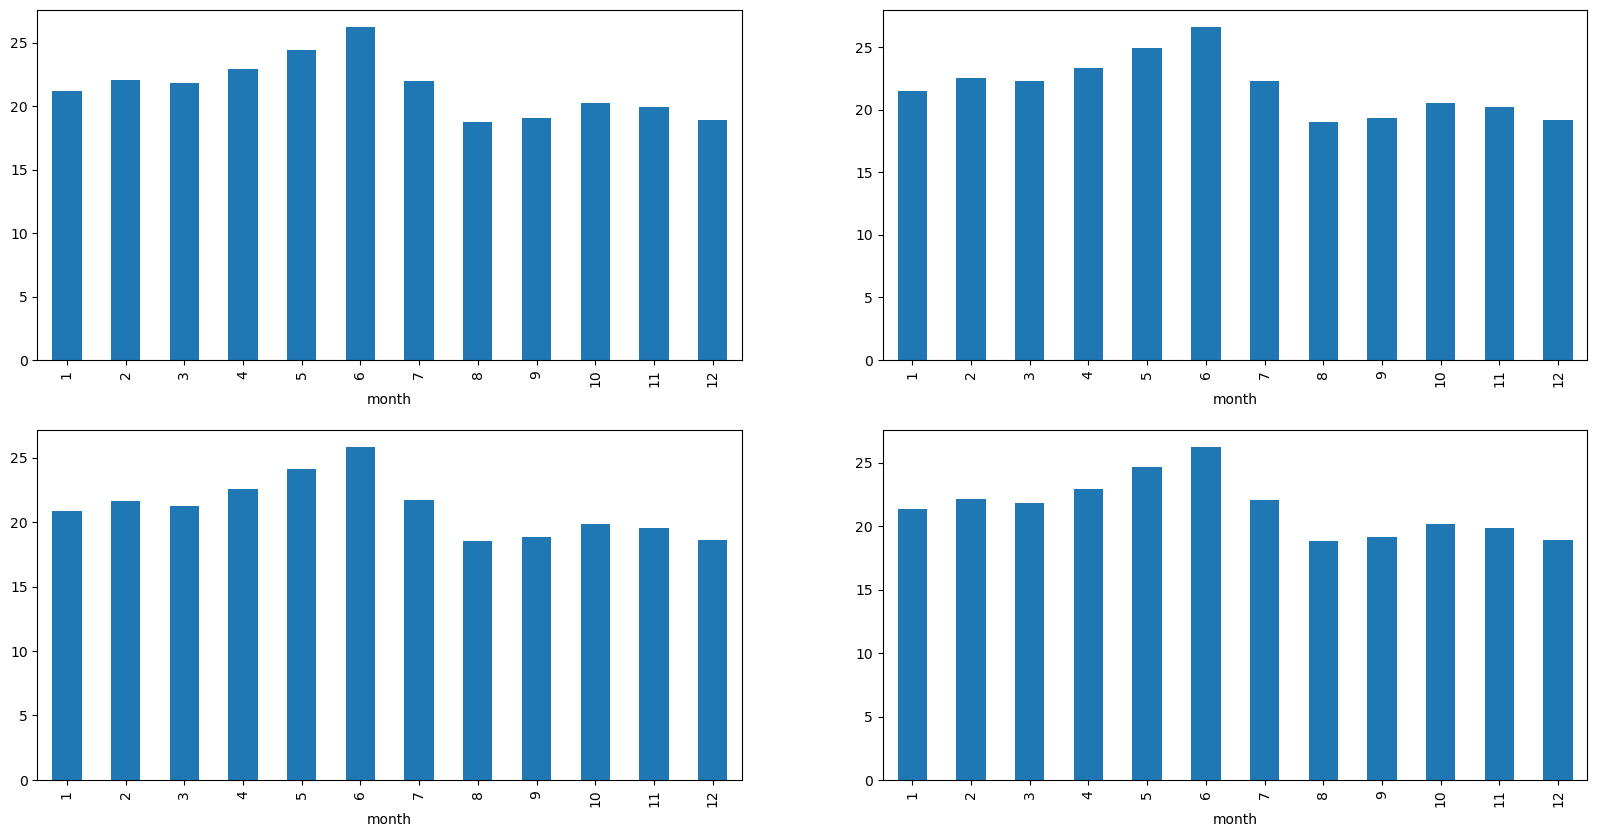

Data for  4 th company :- 


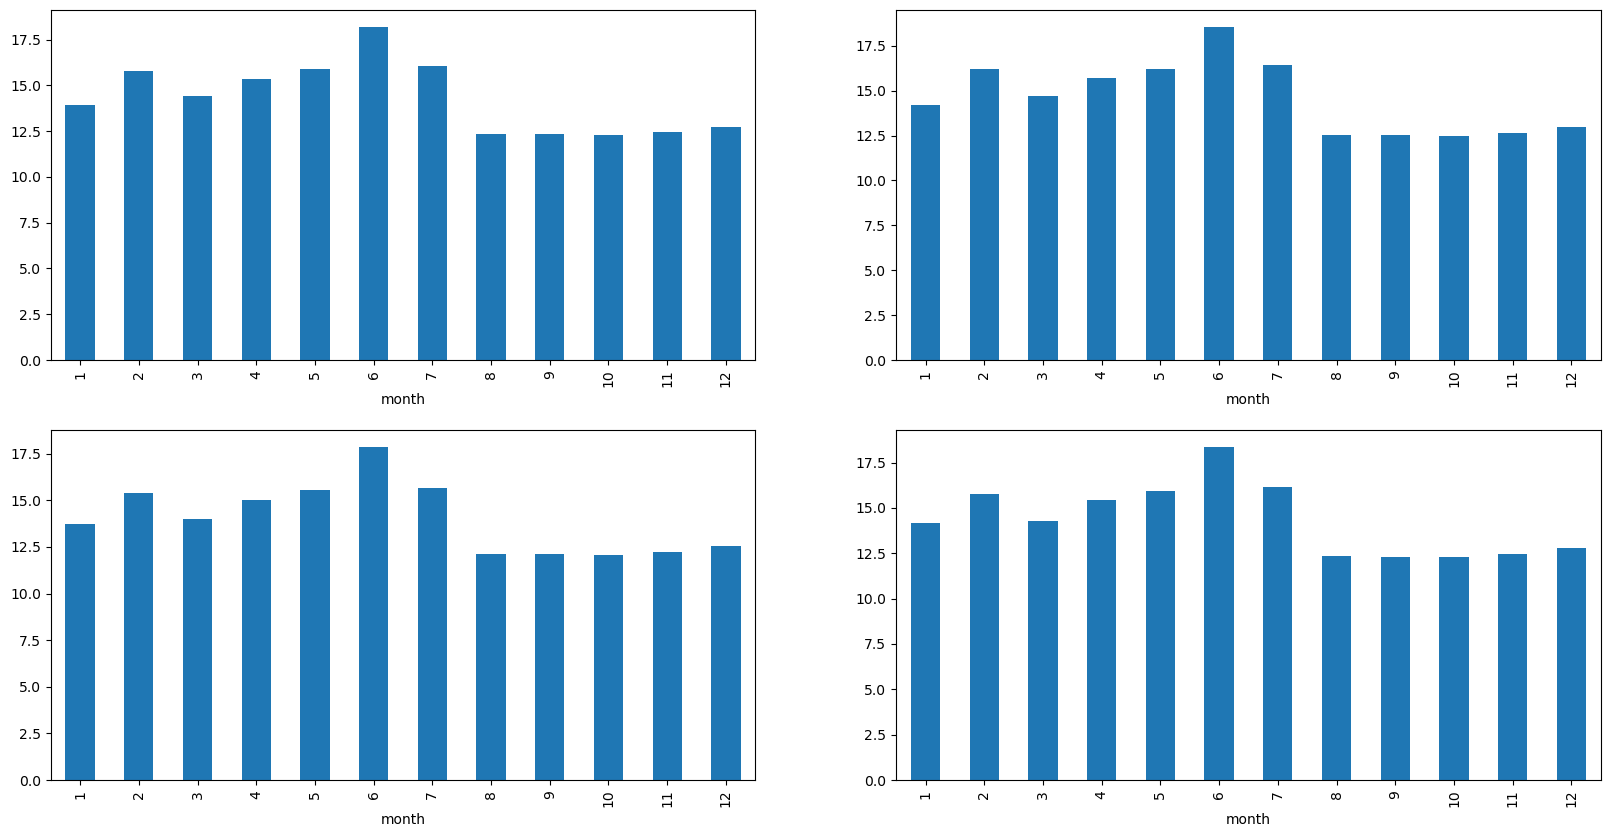

In [5]:
train_files = ['1_train.csv', '2_train.csv', '3_train.csv', '4_train.csv']
for y in range(0,4):
    if y==0 : 
        print("Data for ",y+1,"st company :- ")
    elif y ==1 :
        print("Data for ",y+1,"nd company :- ")
    elif y ==1 :
        print("Data for ",y+1,"rd company :- ")
    else:
        print("Data for ",y+1,"th company :- ")
     
    training_data1 = pd.read_csv(train_files[y])
    splitted = training_data1['Date'].str.split('-', expand=True)  # Splitting data in terms of date, month and year
   
    # Creating new columns in dataframe :-
    
    training_data1['day'] = splitted[0].astype('int')         
    training_data1['month'] = splitted[1].astype('int')
    training_data1['year'] = splitted[2].astype('int')
    
    
    data_grouped = training_data1.groupby('month').mean()
    plt.subplots(figsize=(20,10))


    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
        plt.subplot(2,2,i+1)
        data_grouped[col].plot.bar()
    plt.show()


# Observations

### - The Low - High data give the data about how volatile the stock price is on that day, more is the absolute         difference more will be the difference in open and close.
### - The quarter end plays an important role in stock price and stock price fluctuates most here so create new columns for checking wheather is it a end of qrarter.
### - Volume is important as the day volume of is more , more is the activity in stock price recorded.
### - Adjusted close gives an idea that the close price is around it.

## Applying ridge regression on the following columns with target as close price :- 
#### -> open
#### -> low - high
#### -> is_quarter_end
#### -> volume
#### -> Adj Close

In [6]:
train_files = ['1_train.csv', '2_train.csv', '3_train.csv', '4_train.csv']
models = {}        # Creating a dictionary to store separate models for all 4 different company where its key is going to be its id.

i=1
for file in train_files:       
    
    df = pd.read_csv(file)         # Reading file                    
    
    splitted = df['Date'].str.split('-', expand=True)  # Splitting data in terms of date, month and year
   
    # Creating new columns in dataframe :-
    
    df['day'] = splitted[0].astype('int')         
    df['month'] = splitted[1].astype('int')
    df['year'] = splitted[2].astype('int')
 
    # Creating column to know wheather its end of quater or not :-
    
    df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
    
    df["open"] = df["Open"]                    
    df['low-high']  = df['Low'] - df['High']   # Creating a column for low - high
    df['target'] = df["Close"]                 # Assigning taget to be close
     
    
    features = df[['open', 'low-high', 'is_quarter_end',"Volume","Adj Close"]]  # This are the columns on which we are going to train our data on.
    target = df['target']
 

    company_id = i   

    i=i+1
   
    ridge = Ridge(alpha=1.0)
    ridge.fit(features,target)
    models[company_id] = ridge    # This line stores our model in dictionary with key as company_id (1 to 4)


In [7]:

test_data = pd.read_csv('test.csv')  

splitted = df['Date'].str.split('-', expand=True)   # Splitting data in terms of date, month and year

# Creating new columns in dataframe :

test_data['day'] = splitted[0].astype('int')
test_data['month'] = splitted[1].astype('int')
test_data['year'] = splitted[2].astype('int')
 
# Creating column to know wheather its end of quater or not :- 
test_data['is_quarter_end'] = np.where(test_data['month']%3==0,1,0)


test_data['open']  = test_data['Open']              
test_data['low-high']  = test_data['Low'] - test_data['High']           # Creating a column for low - high


submission_df = pd.DataFrame(columns=['Id', 'Close'])  # Creating data frame to store result
submission_df['Id'] = test_data['ID']       # Assiging id of the row

for i, row in test_data.iterrows():       # iterating to each row and predicting the value and assinging it to Close column
    comp_id = row['Company']      
    model = models[comp_id]               # The company id we get in test data is used to know which model to use

    X_test = row[['open', 'low-high', 'is_quarter_end',"Volume","Adj Close"]].to_numpy().reshape(1, -1)  # This are the columns on basis of which model is going to predict data.
    row_id = row['ID']
    y_pred = model.predict(X_test)
    submission_df.loc[row_id, 'Close'] = y_pred[0]


In [8]:
submission_df.to_csv("submission.csv", index=False)  # Storing the dataframe in a csv file.

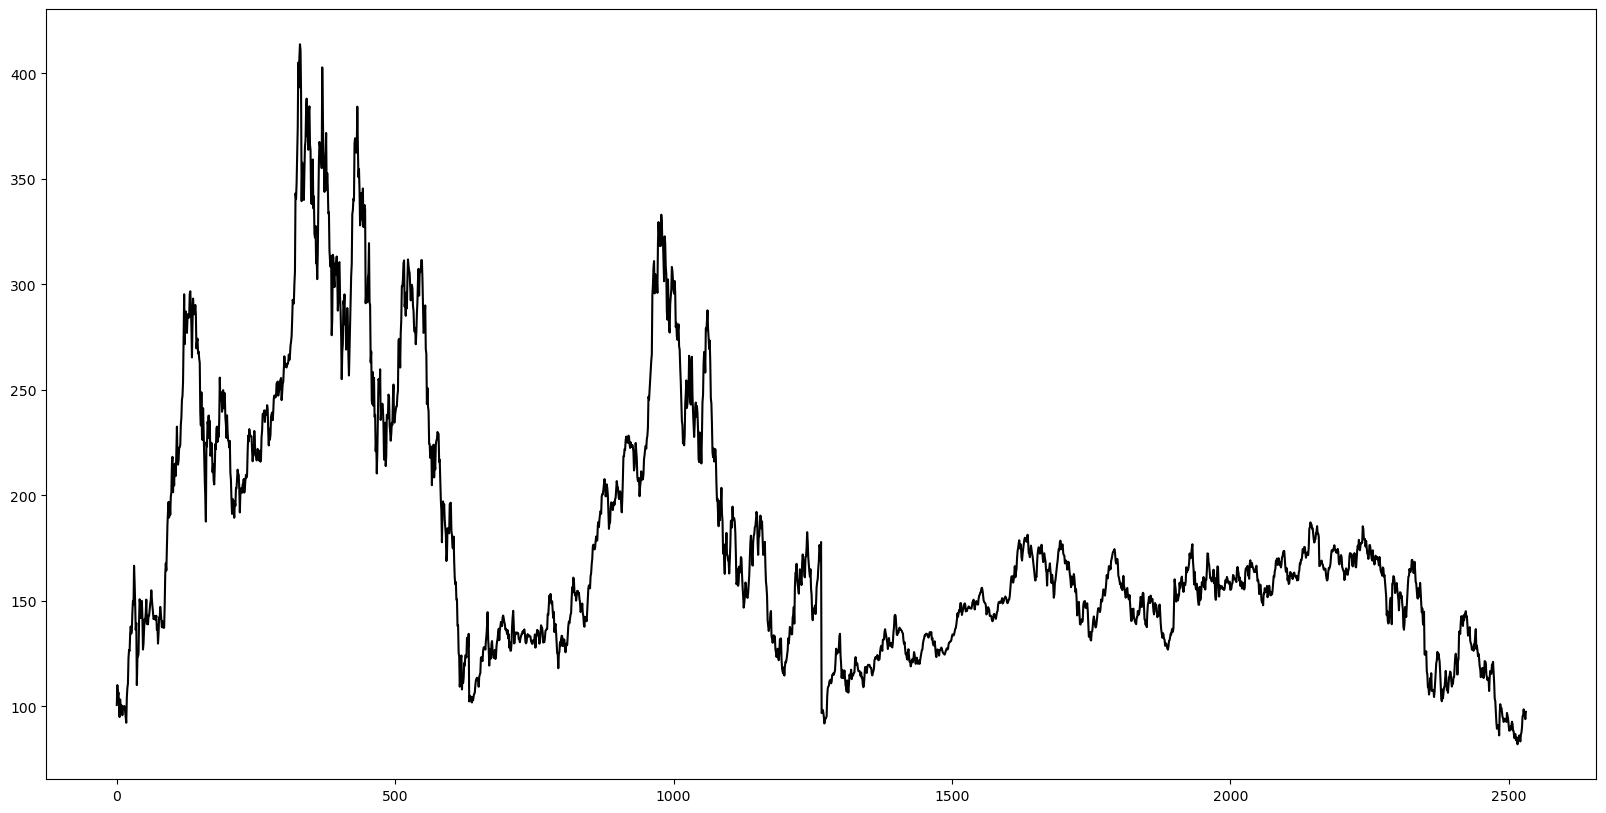

In [9]:
o1 = pd.read_csv("submission.csv")
plt.figure(figsize=(20,10)) 
plt.plot(o1.Id,o1.Close,color = 'black')
